<a href="https://colab.research.google.com/github/him89088/iris_classifier/blob/master/Iris_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [0]:
iris_data = pd.read_csv('/content/drive/My Drive/Data Mining/iris_data.csv')

In [0]:
iris_data.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [0]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    149 non-null float64
Sepal.Width     149 non-null float64
Petal.Length    149 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [0]:
iris_data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,149.000000,149.000000,149.000000,150.000000
mean,5.853691,3.064430,3.753020,1.199333
std,0.821051,0.428554,1.770195,0.762238
min,4.400000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [0]:
print(iris_data.isna().sum())

Sepal.Length    1
Sepal.Width     1
Petal.Length    1
Petal.Width     0
Species         0
dtype: int64


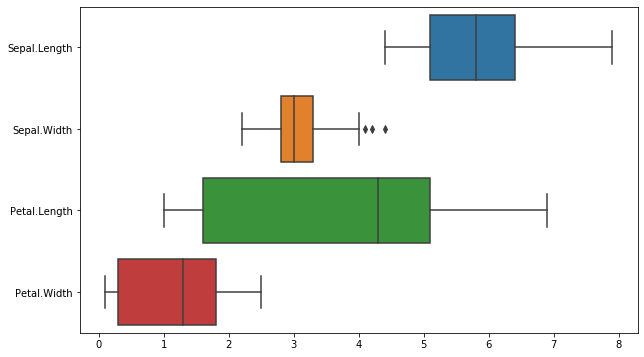

In [0]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
sns.boxplot(data=iris_data, ax=ax, orient='h')

In [0]:
median_value_sepal_len = iris_data['Sepal.Length'].median()
print(median_value_sepal_len)
iris_data['Sepal.Length.Median'] = iris_data['Sepal.Length'].fillna(median_value_sepal_len)

5.8


In [0]:
median_value_petal_len = iris_data['Petal.Length'].median()
print(median_value_petal_len)
iris_data['Petal.Length.Median'] = iris_data['Petal.Length'].fillna(median_value_petal_len)

4.3


In [0]:
median_value_sepal_wid = iris_data['Sepal.Width'].median()
print(median_value_sepal_wid)
iris_data['Sepal.Width.Median'] = iris_data['Sepal.Width'].fillna(median_value_sepal_wid)

3.0


In [0]:
iris_data.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Sepal.Length.Median,Petal.Length.Median,Sepal.Width.Median
count,149.000000,149.000000,149.000000,150.000000,150.000000,150.000000,150.000000
mean,5.853691,3.064430,3.753020,1.199333,5.853333,3.756667,3.064000
std,0.821051,0.428554,1.770195,0.762238,0.818303,1.764810,0.427146
min,4.400000,2.200000,1.000000,0.100000,4.400000,1.000000,2.200000
25%,5.100000,2.800000,1.600000,0.300000,5.100000,1.600000,2.800000
50%,5.800000,3.000000,4.300000,1.300000,5.800000,4.300000,3.000000
75%,6.400000,3.300000,5.100000,1.800000,6.400000,5.100000,3.300000
max,7.900000,4.400000,6.900000,2.500000,7.900000,6.900000,4.400000


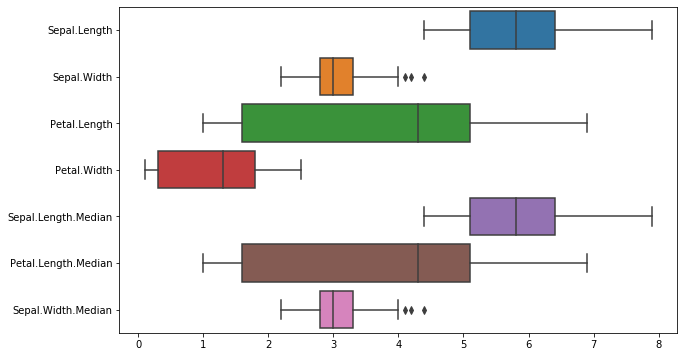

In [0]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
sns.boxplot(data=iris_data, ax=ax, orient='h')

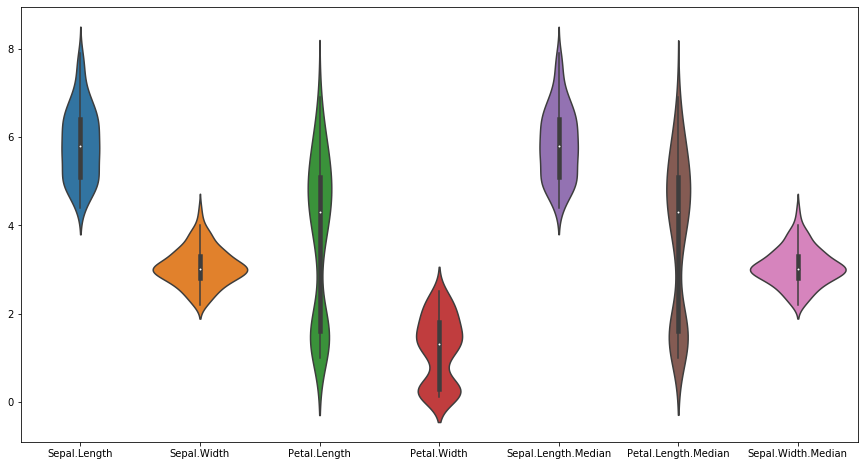

In [0]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.violinplot(data=iris_data,ax=ax)

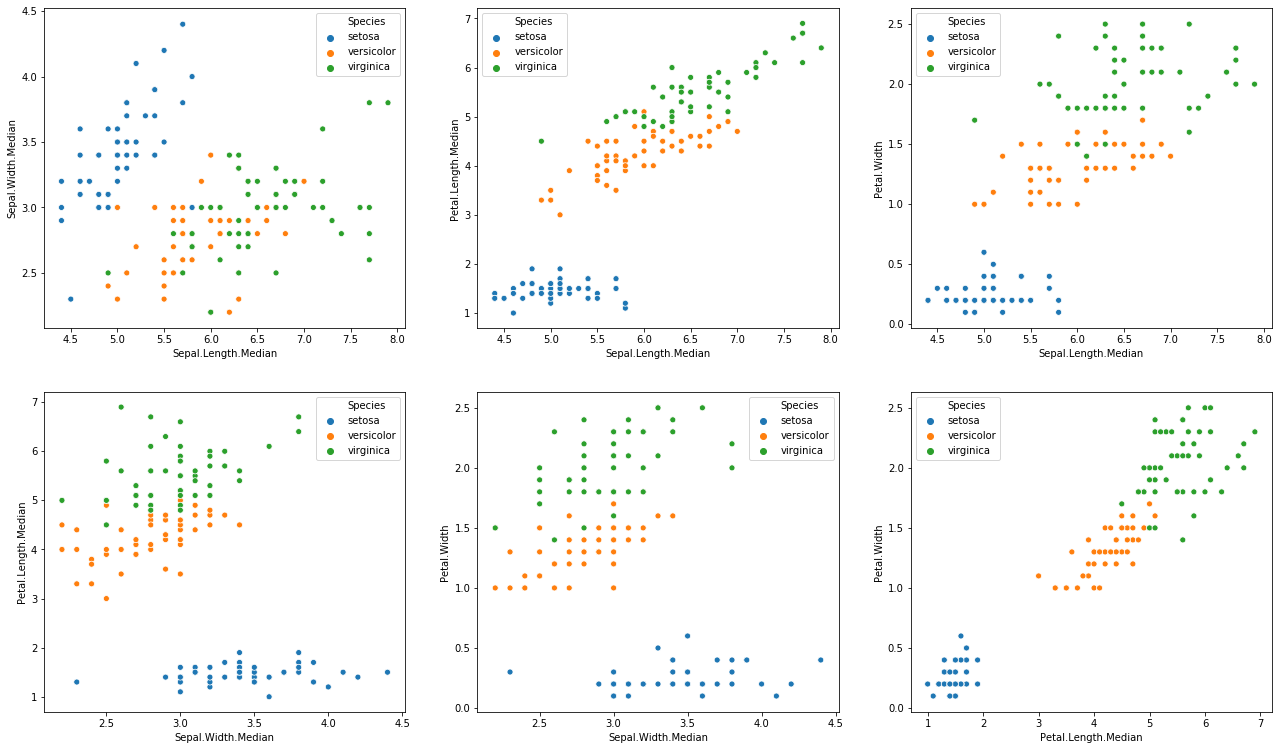

In [0]:
f = plt.figure(figsize=(22,20))
f.add_subplot(331)
sns.scatterplot(x=iris_data['Sepal.Length.Median'],y=iris_data['Sepal.Width.Median'], hue=iris_data.Species)
f.add_subplot(332)
sns.scatterplot(x=iris_data['Sepal.Length.Median'],y=iris_data['Petal.Length.Median'], hue=iris_data.Species)
f.add_subplot(333)
sns.scatterplot(x=iris_data['Sepal.Length.Median'],y=iris_data['Petal.Width'], hue=iris_data.Species)
f.add_subplot(334)
sns.scatterplot(x=iris_data['Sepal.Width.Median'],y=iris_data['Petal.Length.Median'], hue=iris_data.Species)
f.add_subplot(335)
sns.scatterplot(x=iris_data['Sepal.Width.Median'],y=iris_data['Petal.Width'], hue=iris_data.Species)
f.add_subplot(336)
sns.scatterplot(x=iris_data['Petal.Length.Median'],y=iris_data['Petal.Width'], hue=iris_data.Species)

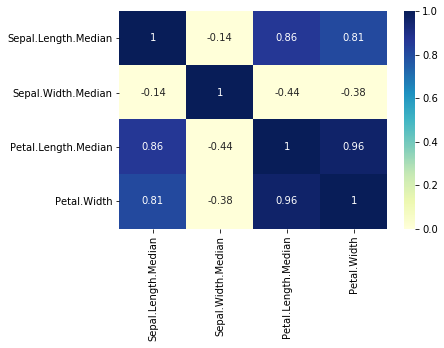

In [0]:
new_col = ['Sepal.Length.Median','Sepal.Width.Median','Petal.Length.Median','Petal.Width']
corr = iris_data[new_col].corr()
sns.heatmap(corr, vmin=0, vmax=1, cmap='YlGnBu', annot=True)

In [0]:
def species_to_numeric(x):
    if x=='setosa':
        return 1
    if x=='versicolor':
        return 2
    if x=='virginica':
        return 3
iris_data['Species.Num'] = iris_data['Species'].apply(species_to_numeric)
print(iris_data['Species.Num'])

In [0]:
new_cols = ['Sepal.Length.Median','Sepal.Width.Median','Petal.Length.Median','Petal.Width','Species.Num']
array = iris_data[new_cols].values
X = array[:,0:4]
y = array[:,4]

In [0]:
model = LogisticRegression(solver='newton-cg', C=10.0, multi_class='multinomial', random_state=0).fit(X,y)

score:  0.98
classification report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        50
         2.0       0.98      0.96      0.97        50
         3.0       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



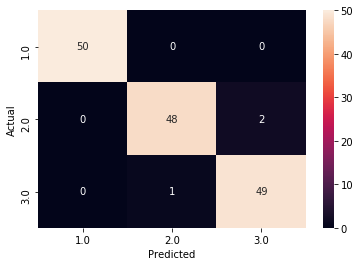

In [0]:
y_pred = model.predict(X)
score_ = model.score(X, y)
print('score: ',score_)
conf_p = pd.crosstab(y,y_pred,rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_p, annot=True)
report = classification_report(y, y_pred)
print("classification report: \n", report)

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.api import add_constant
X=iris_data[['Sepal.Length.Median','Petal.Width','Petal.Length.Median','Sepal.Width.Median']]
X = add_constant(X)
y=iris_data['Species.Num']
vif = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.to_numpy().shape[1])]

print(vif[1:])

[6.05891182956111, 15.710521947826974, 28.487801803795488, 1.9254313633003337]


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
from sklearn.model_selection import train_test_split

NameError: ignored

In [0]:
new_cols_vif = ['Sepal.Length.Median','Sepal.Width.Median','Species.Num']
array_vif = iris_data[new_cols_vif].values
X_vif = array_vif[:,0:2]
y_vif = array_vif[:,2]
x_train,x_test,y_train,y_test=train_test_split(X_vif,y_vif,test_size=0.2)

In [0]:
model = LogisticRegression(solver='newton-cg', C=10.0, multi_class='multinomial', random_state=0).fit(x_train,y_train)

score:  0.8333333333333334
classification report: 
               precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        11
         2.0       0.69      0.90      0.78        10
         3.0       0.83      0.56      0.67         9

    accuracy                           0.83        30
   macro avg       0.84      0.82      0.82        30
weighted avg       0.85      0.83      0.83        30



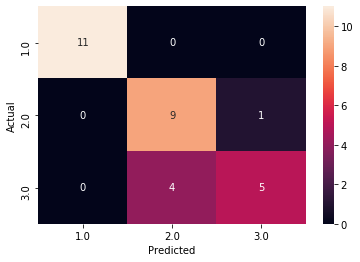

In [0]:
y_pred_vif = model.predict(x_test)
score_vif = model.score(x_test, y_test)
print('score: ',score_vif)
conf_p_vif = pd.crosstab(y_test,y_pred_vif, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(conf_p_vif, annot=True)
report_vif = classification_report(y_test, y_pred_vif)
print("classification report: \n", report_vif)

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred_vif, multi_class='ovo')
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_vif)


AxisError: ignored